# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [27]:
import pandas as pd

In [28]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [29]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [91]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [92]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [94]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [95]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.443330,41.523063,10239340,19827553.13
1,11020,21.166269,41.760859,10285410,20293021.43
2,11030,21.553622,34.676168,9488120,15264795.74
3,11040,21.950757,39.907793,9952210,18093714.50
4,11050,22.779081,43.712430,9761770,18732568.44


In [96]:
night_df_seoul_moving = pd.read_csv('night_df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [97]:
night_df_seoul_moving.head()

,도착 시군구 코드,밤 평균 이동 시간(분),밤 이동인구(합),밤 총 이동 시간,밤 총 이동인구
0,11010,22.489242,10.890982,883220,427721.53
1,11020,22.748473,13.093404,979390,563710.32
2,11030,23.358921,13.038535,973740,543524.37
3,11040,23.879422,14.131565,1065070,630296.05
4,11050,25.393452,17.233477,1136230,771111.95


In [98]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [99]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [100]:
df = pd.merge(df,night_df_seoul_moving,how='inner', on='도착 시군구 코드')

In [101]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,밤 평균 이동 시간(분),밤 이동인구(합),밤 총 이동 시간,밤 총 이동인구
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.443330,41.523063,10239340,19827553.13,22.489242,10.890982,883220,427721.53
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.166269,41.760859,10285410,20293021.43,22.748473,13.093404,979390,563710.32
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.553622,34.676168,9488120,15264795.74,23.358921,13.038535,973740,543524.37
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.950757,39.907793,9952210,18093714.50,23.879422,14.131565,1065070,630296.05
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.779081,43.712430,9761770,18732568.44,25.393452,17.233477,1136230,771111.95


In [128]:
df['승하차총승객수차이'] = df['승차총승객수'] - df['하차총승객수']

In [129]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,밤 평균 이동 시간(분),밤 이동인구(합),밤 총 이동 시간,밤 총 이동인구,승하차총승객수차이
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.443330,41.523063,10239340,19827553.13,22.489242,10.890982,883220,427721.53,263541
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.166269,41.760859,10285410,20293021.43,22.748473,13.093404,979390,563710.32,177743
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.553622,34.676168,9488120,15264795.74,23.358921,13.038535,973740,543524.37,103503
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,21.950757,39.907793,9952210,18093714.50,23.879422,14.131565,1065070,630296.05,60542
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.779081,43.712430,9761770,18732568.44,25.393452,17.233477,1136230,771111.95,-3963


---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요? 승차

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

In [52]:
plt.rc('font', family='Nanum')
sns.set(font="NanumGothicCoding", rc={"axes.unicode_minus":False}, style='darkgrid')

In [53]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


In [146]:
target = "정류장수" 
feature = "이동인구(합)"

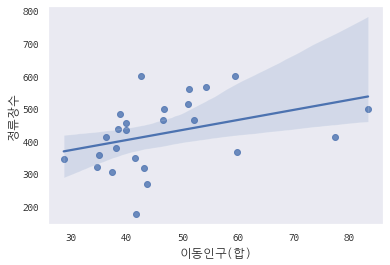

In [147]:
sns.regplot(x=feature, y=target, data=df)
plt.grid()
plt.show()

In [145]:
spst.pearsonr(df[feature], df[target])

(0.3585310360765819, 0.07842047180561913)

In [57]:
target = "승하차총승객수차이"
feature = "평균 이동 시간(분)"

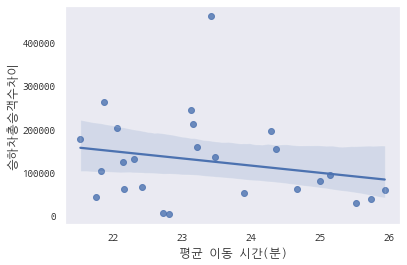

In [58]:
sns.regplot(x=feature, y=target, data=df)
plt.grid()
plt.show()

In [59]:
spst.pearsonr(df[feature], df[target])

(-0.2239257453350675, 0.28190654048897107)

In [124]:
target = "승하차총승객수차이"
feature = "밤 이동인구(합)"

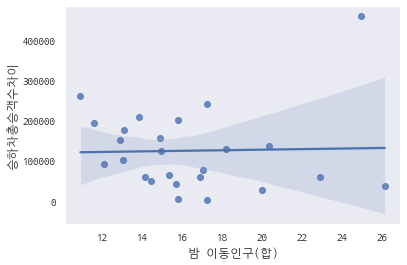

In [125]:
sns.regplot(x=feature, y=target, data=df)
plt.grid()
plt.show()

In [126]:
spst.pearsonr(df[feature], df[target])

(0.027312271908749436, 0.8968878727246236)

In [139]:
target = "승하차총승객수차이"
feature = "자치구"

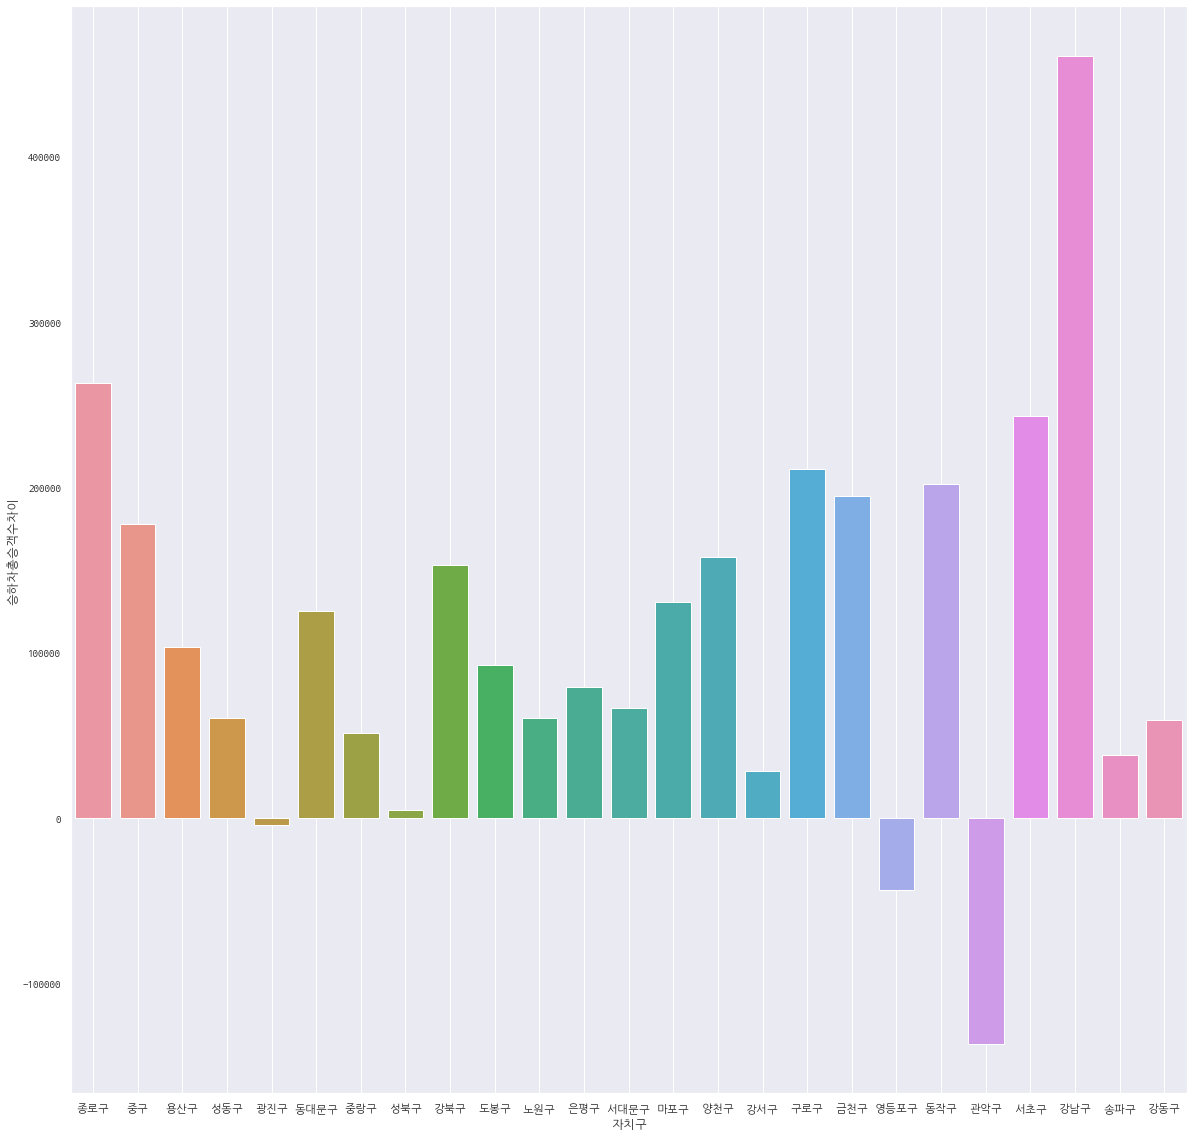

In [140]:
plt.figure(figsize=(20,20))
sns.barplot(x=feature, y=target, data=df)

plt.grid()
plt.show()

### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [ ]:
target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [119]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

NameError: name 'X' is not defined

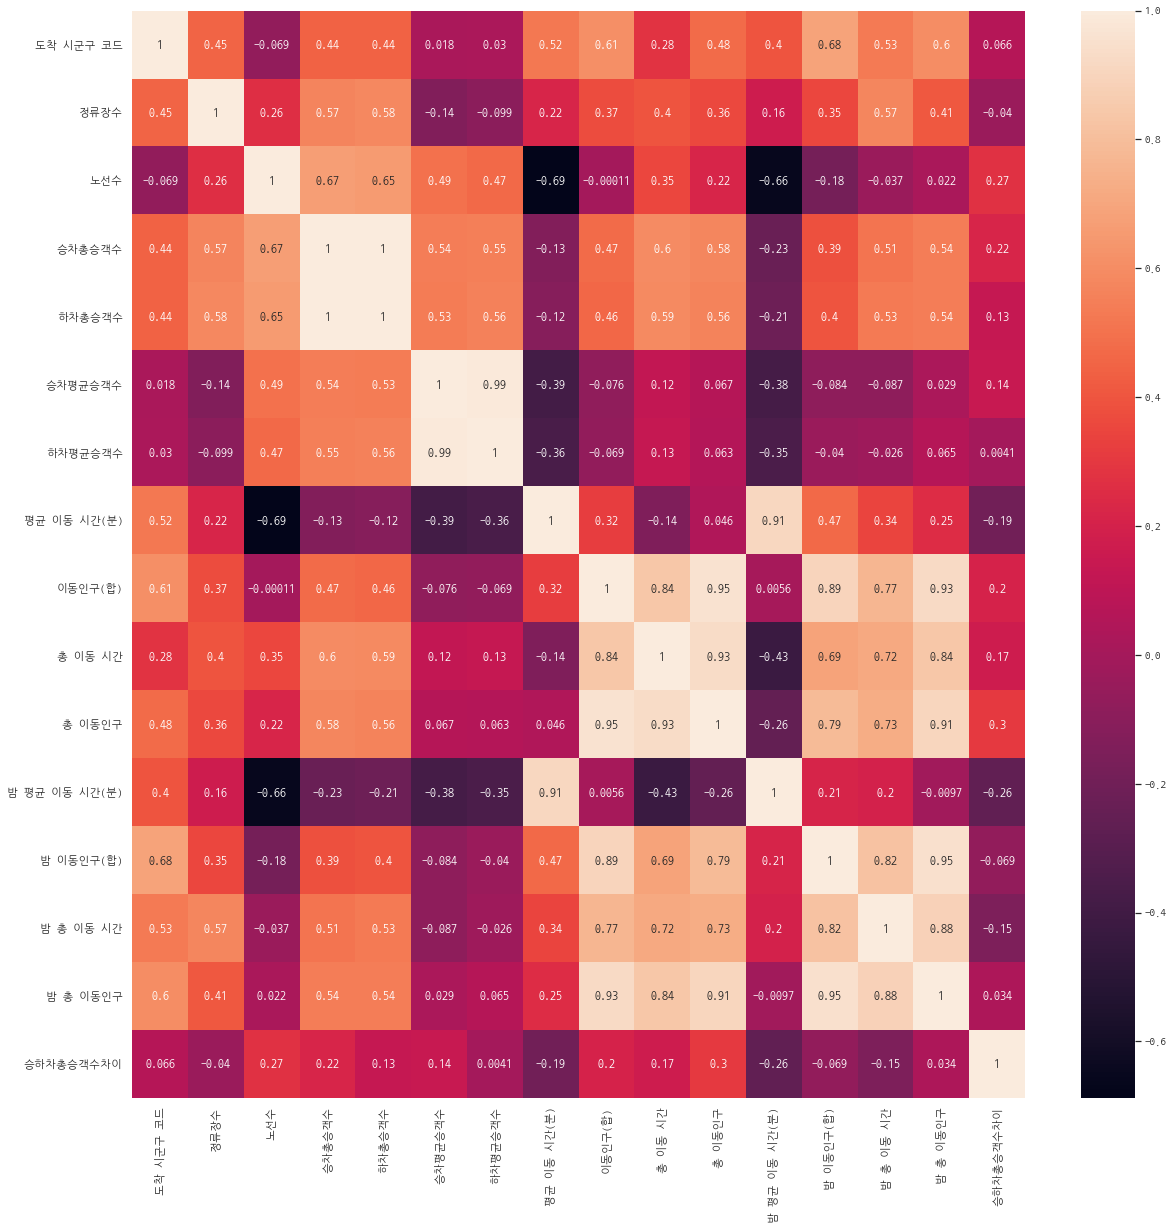

In [130]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

(⊙_⊙)？